## **Facial Expression Recognition**

## Abstract
The face recognition procedure simply requires any device that has digital photographic technology to generate and obtain the images and data necessary to communicate their intentions and emotions. Facial expression can be classified into anger, disgust, fear, happy, sad, surprise and neutral.

## Objective
To develop a Facial Expression Recognition system which accurately recognizes facial expression in real time.


## Import Dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, BatchNormalization

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Image Dataset

In [2]:
train = pd.read_csv('drive/MyDrive/Projects/Python/dataset/icml_face_data.csv')
print(train.shape)

(35887, 3)


In [3]:
train.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


## Preprocessing Image Data

### Defining function to preprocess the pixels data

In [4]:
def pixels_to_array(pixels):
    """
    function to convert the string pixels into list of float data
    """
    return np.array(pixels.split(), 'float64')


def image_reshape(data):
    """
    function to convert single dimension array into 2D numpy array
    """
    image_array = np.zeros(shape=(len(data), 48, 48))

    for i, pixel in enumerate(data):
        image_array[i] = pixel.reshape(48, 48)
        
    return image_array

In [5]:
# preprocessing pixels
train['pixels'] = train[' pixels'].apply(pixels_to_array)

# Creating variable with dependent and independent feature
X = image_reshape(train['pixels'])
y = train.emotion

In [6]:
X[:3]

array([[[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]],

       [[151., 150., 147., ..., 129., 140., 120.],
        [151., 149., 149., ..., 122., 141., 137.],
        [151., 151., 156., ..., 109., 123., 146.],
        ...,
        [188., 188., 121., ..., 185., 185., 186.],
        [188., 187., 196., ..., 186., 182., 187.],
        [186., 184., 185., ..., 193., 183., 184.]],

       [[231., 212., 156., ...,  44.,  27.,  16.],
        [229., 175., 148., ...,  27.,  35.,  27.],
        [214., 156., 157., ...,  28.,  22.,  28.],
        ...,
        [241., 245., 250., ...,  57., 101., 146.],
        [246., 250., 252., ...,  78., 105., 162.],
        [250., 251., 250., ...,  88., 110., 152.]]])

In [7]:
# list of labels
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

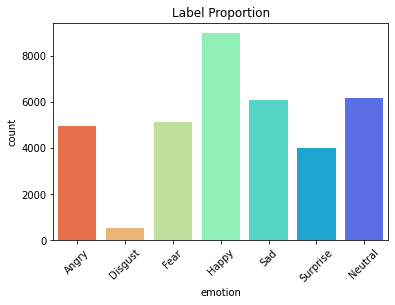

In [8]:
sns.countplot(y, palette="rainbow_r")
plt.xticks(np.arange(7), emotions, rotation=45)

plt.title("Label Proportion")
plt.savefig("figure00.png")
plt.show()

### Sample data

Lets have a look on our image data, how the images are and their size and all.

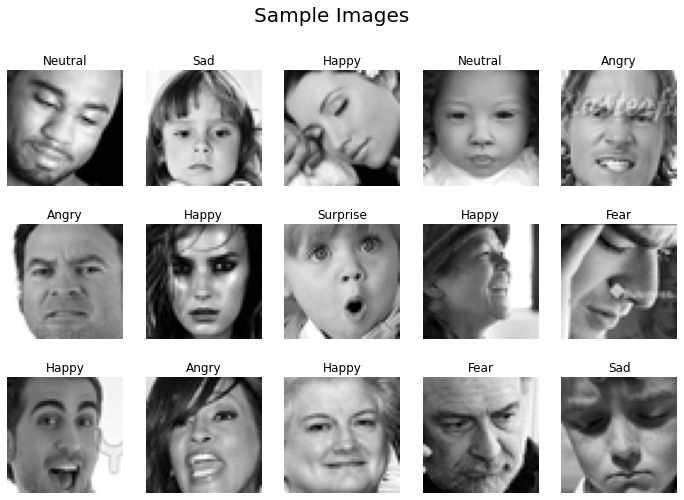

In [9]:
fig = plt.figure(figsize=(12, 8))

for img_slot in range(1, 16):
    # fetching random image data 
    testcase = np.random.randint(28000)

    # adding image on canvas
    ax = fig.add_subplot(3, 5, img_slot)
    plt.imshow(X[testcase].reshape(48, 48), cmap="gray")

    # labelling image
    plt.title(emotions[y[testcase]])
    plt.axis("off")

plt.suptitle("Sample Images", fontsize=20)
plt.savefig("figure01.png")
plt.show()

### Now lets check if the images are labelled correctly.

1) Angry


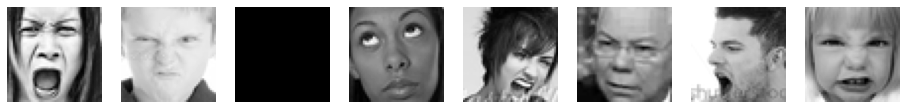

2) Disgust


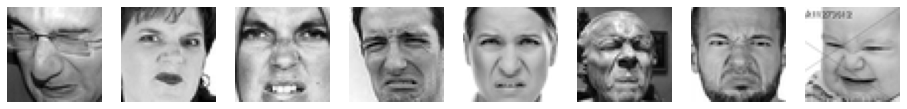

3) Fear


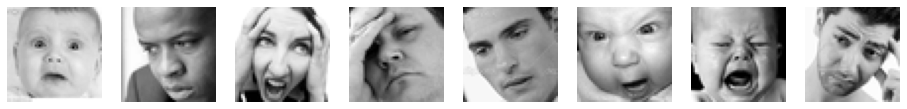

4) Happy


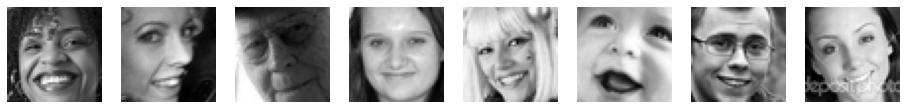

5) Sad


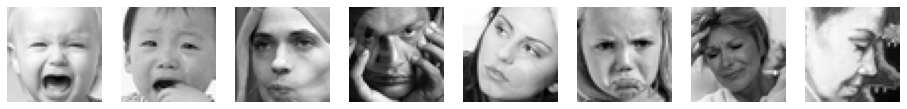

6) Surprise


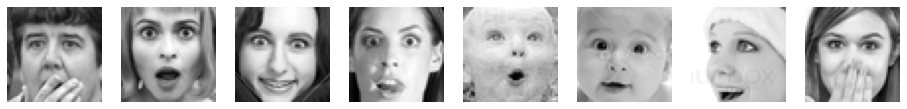

7) Neutral


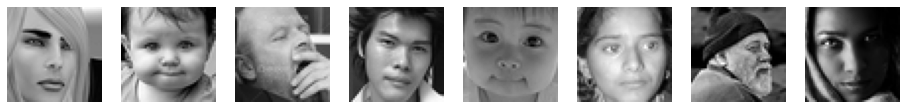

In [10]:
# 7 iteration for getting 7 different emotions
for i in range(7):
    # fetching 8 image data for each emotions
    pixels = train.query(f"emotion=={i}")['pixels'].sample(8).values

    fig = plt.figure(figsize=(16, 16))
    print(f"{i+1}) {emotions[i]}")

    # adding the images on canvas
    for c, j in enumerate(pixels):
        ax = fig.add_subplot(7, 8, c+1)
        plt.imshow(j.reshape(48, -1), cmap="gray")
        plt.axis("off")
    plt.savefig(f"figure0{c+2}.png")
    plt.show()


### Splitting Dataset into Training, Testing and Validation Set

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=121)

print("Training Set Size:\n", "\t X: ", x_train.shape, "\n", "\t Y: ", y_train.shape)
print("Testing Set Size:\n", "\t X: ", x_test.shape, "\n", "\t Y: ", y_test.shape)
print("Validation Set Size:\n", "\t X: ", x_val.shape, "\n", "\t Y: ", y_val.shape)

Training Set Size:
 	 X:  (28709, 48, 48) 
 	 Y:  (28709,)
Testing Set Size:
 	 X:  (4306, 48, 48) 
 	 Y:  (4306,)
Validation Set Size:
 	 X:  (2872, 48, 48) 
 	 Y:  (2872,)


### Converting image data into 48x48x1 dim and Normalizing the array data

In [12]:
x_train_img = x_train.reshape(len(x_train), 48, 48, 1)/255
x_test_img = x_test.reshape(len(x_test), 48, 48, 1)/255
x_val_img = x_val.reshape(len(x_val), 48, 48, 1)/255

### Label Encoding

Encoding labels using labelbinarizer to use it for multiclass prediction.

In [13]:
from sklearn.preprocessing import LabelBinarizer

lbz = LabelBinarizer()

lbz.fit(y_train)

y_train_labels = lbz.transform(y_train)
y_test_labels = lbz.transform(y_test)
y_val_labels = lbz.transform(y_val)

### Sample Proportion

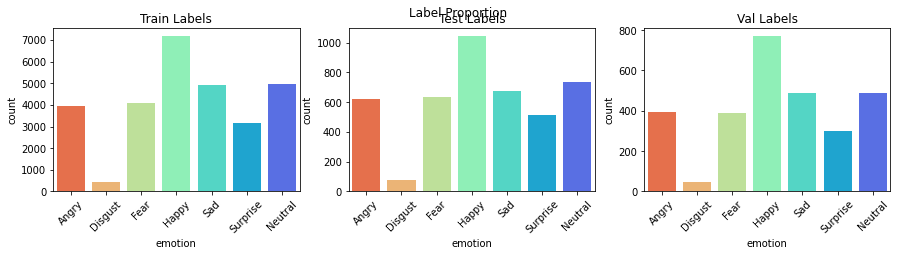

In [14]:
fig = plt.figure(figsize=(15, 3))
for img_slot, i in enumerate([("train labels", y_train), ("test labels", y_test), ("val labels", y_val)]):
    ax = fig.add_subplot(1, 3, img_slot+1)
    sns.countplot(i[1], palette="rainbow_r")
    plt.title(f"{i[0].title()}")
    plt.xticks(np.arange(7), emotions, rotation=45)

plt.suptitle("Label Proportion")
plt.savefig("figure09.png")
plt.show()

## Model Development

### CNN Model

CNNs use image recognition and classification in order to detect objects, recognize faces, etc. They are made up of neurons with learnable weights and biases. Each specific neuron receives numerous inputs and then takes a weighted sum over them, where it passes it through an activation function and responds back with an output.

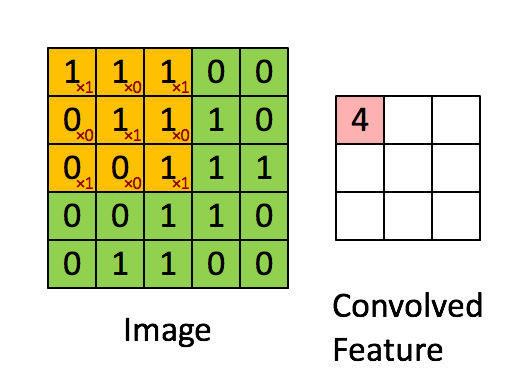

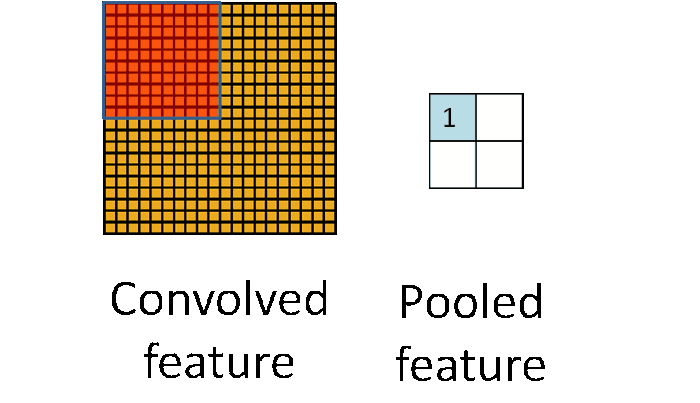

In [15]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(48,48,1)),
    tf.keras.layers.experimental.preprocessing.RandomContrast(factor = 0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'),
    
    tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(16,5,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2),
    
    tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(emotions), activation='softmax'),
])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 random_contrast (RandomCont  (None, 48, 48, 1)        0         
 rast)                                                           
                                                                 
 random_flip (RandomFlip)    (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)        0

#### Model Tuning

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', 
              metrics=['accuracy'], run_eagerly=True)
earlystop = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=1e-4, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=1e-7)

#### Training Model

In [18]:
%%time 

h1 = cnn.fit(
    x_train_img, y_train_labels, 
    batch_size=256,
    epochs = 50,
    verbose = 1,
    validation_data = (x_val_img, y_val_labels)
)

Epoch 1/50
113/113 [==============================] - 18s 147ms/step - loss: 1.7458 - accuracy: 0.3140 - val_loss: 2.0831 - val_accuracy: 0.1052
Epoch 2/50
113/113 [==============================] - 16s 144ms/step - loss: 1.5432 - accuracy: 0.3961 - val_loss: 1.9382 - val_accuracy: 0.1347
Epoch 3/50
113/113 [==============================] - 16s 145ms/step - loss: 1.4544 - accuracy: 0.4343 - val_loss: 2.2455 - val_accuracy: 0.1347
Epoch 4/50
113/113 [==============================] - 16s 146ms/step - loss: 1.3766 - accuracy: 0.4709 - val_loss: 3.8384 - val_accuracy: 0.1052
Epoch 5/50
113/113 [==============================] - 16s 145ms/step - loss: 1.3191 - accuracy: 0.4942 - val_loss: 2.2031 - val_accuracy: 0.1480
Epoch 6/50
113/113 [==============================] - 16s 145ms/step - loss: 1.2690 - accuracy: 0.5160 - val_loss: 1.5940 - val_accuracy: 0.4095
Epoch 7/50
113/113 [==============================] - 16s 146ms/step - loss: 1.2147 - accuracy: 0.5371 - val_loss: 1.3787 - val_ac

#### Model Evaluation

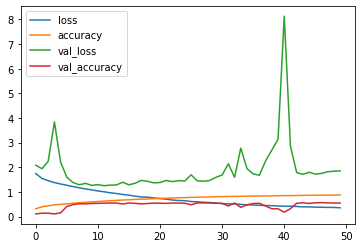

In [19]:
for key in h1.history.keys():
    plt.plot(h1.history[key], label=key)
plt.legend()

In [20]:
cnn.evaluate(x_test_img, y_test_labels)
test_pred = cnn.predict(x_test_img)

135/135 [==============================] - 4s 26ms/step - loss: 1.7877 - accuracy: 0.5453


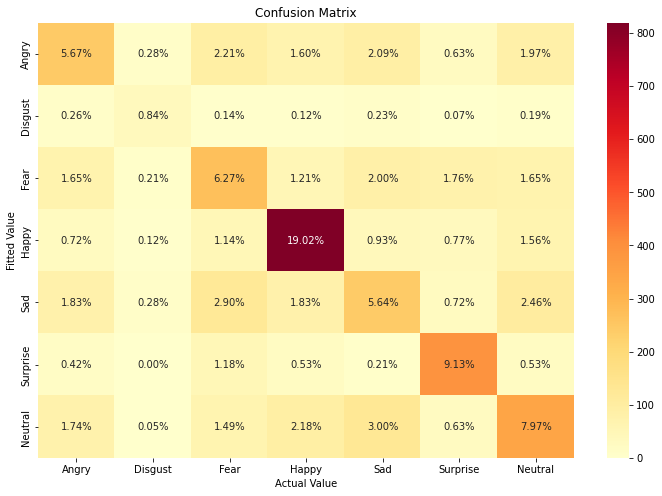

In [21]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_true= y_test, y_pred=np.argmax(test_pred, axis=1))

group_percent = [f'{i:.2%}' for i in cm.reshape(1,-1)[0]/np.sum(cm)]
annot = np.asarray([f'{i}' for i in group_percent]).reshape(7,7)

ax = sns.heatmap(cm, annot=annot, fmt='', cmap='YlOrRd')
ax.set(xlabel = 'Actual Value', ylabel = 'Fitted Value', xticklabels = emotions, yticklabels = emotions, title = 'Confusion Matrix')
plt.show()